# Exploratory Data Analysis

In this section, we will perform data profiling on the training dataset - `customer.csv`.
The objective of this section is to understand the data that will be used to train the model, making use of statistics and visualizations, in order to identify potential issues that need to be addressed in the data preprocessing section.

## Dataset Overview
<table>
<thead>
<tr>
<th>Column Name</th>

<th>Type of Attribute</th>
</tr>
</thead>
<tbody>
<tr>
<td>custid</td>
<td>Categorical Nominal</td>
</tr>
<tr>
<td>sex</td>
<td>Categorical Nominal</td>
</tr>
<tr>
<td>is_employed</td>
<td>Categorical Nominal</td>
</tr>
<tr>
<td>income</td>
<td>Numerical Ratio</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical Nominal</td>
</tr>
<tr>
<td>health_ins</td>
<td>Categorical Nominal</td>
</tr>
<tr>
<td>housing_type</td>
<td>Categorical Nominal</td>
</tr>
<tr>
<td>num_vehicles</td>
<td>Numerical Ratio</td>
</tr>
<tr>
<td>age</td>
<td>Numerical Ratio</td>
</tr>
<tr>
<td>state_of_res</td>
<td>Categorical Nominal</td>
</tr>
<tr>
<td>code_column</td>
<td>Numerical Ratio</td>
</tr>
<tr>
<td>gas_usage</td>
<td>Numerical Ratio</td>
</tr>
<tr>
<td>rooms</td>
<td>Categorical Nominal</td>
</tr>
<tr>
<td>recent_move_b</td>
<td>Categorical Nominal</td>
</tr>
</tbody>
</table>



In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [107]:
df = pd.read_csv('../data/customer.csv')
rows,features = df.shape
print(f"Our dataset consists of {rows} rows and {features} features")

Our dataset consists of 72458 rows and 15 features


In [108]:
t_sum = df.isnull().sum().sum()
percentual = round(t_sum/(len(df)*len(df.columns))*100, 2)
print(f'\nIn our dataset we have a total of {t_sum} missing values ({percentual}%)')
print(f'Total Duplicated rows {df.duplicated().sum()}')


In our dataset we have a total of 32260 missing values (2.97%)
Total Duplicated rows 0


## Feature accessment

Now let's take a look at the characteristics of our dataset's features, such as the data type, the number of unique values, distribution of the values, etc. These individual insights can help us to understand the dataset better and to identify potential problems. First, let's write some useful functions to help us with this task.

In [109]:
def plot_category_distribution(df, column, palette='icefire'):
    """
    Plots a horizontal bar chart showing the distribution of categories in a specified column.
    """

    column_data = df[column].fillna('Missing')
    counts = column_data.value_counts()
    percentages = counts / counts.sum() * 100

    colors = sns.color_palette(palette, n_colors=len(counts))

    fig, ax = plt.subplots(figsize=(8, 4))
    bars = ax.barh(
        counts.index.astype(str), 
        percentages, 
        color=colors, 
        height=0.8
    )

    for bar, count, percentage in zip(bars, counts, percentages):
        ax.text(
            bar.get_width() / 2, 
            bar.get_y() + bar.get_height() / 2,
            f'{percentage:.1f}%\n({count:,})',
            ha='center',
            va='center',
            color='white',
            fontsize=7,  
        )

    ax.set_xlabel('Percentage')
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.set_xlim(0, 100)

    plt.tight_layout()
    plt.show()

def plot_numeric_distribution(df, column, bins=30):
    """
    Plots a histogram showing the distribution of values in a specified column.
    """

    column_data = df[column].dropna()

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.hist(column_data, bins=bins, color='skyblue', edgecolor='black',range=(column_data.min(), column_data.max()))

    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{column.capitalize()} Distribution')

    plt.tight_layout()
    plt.show()


def show_num_missing_values(df, column):
    """
    Prints the number of missing values in each column of a DataFrame.
    """
    num_missing = df[column].isnull().sum()
    perct_missing = round(df[column].isnull().sum()/len(df)*100,2)
    if(num_missing == 0):
        print("There are no missing values in this column.")
    else:
        print("Missing values in this column: ", num_missing, "(",perct_missing,"% )")
        
def plot_feature_vs_target(df, feature, feature_type='categorical', palette='viridis', ylimit=None, x_rotation=0):
    """
    Plots the relationship between a feature and the health_ins target variable.
    """
    target = 'health_ins'
    if feature_type == 'categorical':
        category_counts = (
            df.groupby([feature, target])
                .size()
                .reset_index(name='Count')
        )
        total_counts = (
            df.groupby(feature)
                .size()
                .reset_index(name='Total')
        )

        category_percentages = category_counts.merge(total_counts, on=feature)
        category_percentages['Percentage'] = (
            category_percentages['Count'] / category_percentages['Total'] * 100
        )

        fig, ax = plt.subplots(figsize=(8, 4))
        for target_value, color, label in zip([0, 1], sns.color_palette(palette, n_colors=2), ["False", "True"]):
            subset = category_percentages[category_percentages[target] == target_value]
            
            if df[feature].nunique() == 2: 
                x_ticks = [0, 1] 
            else:
                x_ticks = subset[feature].unique() 

            ax.bar(
                x_ticks, 
                subset['Percentage'],
                color=color,
                alpha=0.7,
                label=label
            )

        ax.set_title(f'{feature.capitalize()} vs {target.capitalize()}')
        ax.set_xlabel(feature)
        plt.xticks(ticks=x_ticks, rotation=x_rotation)
        ax.set_ylabel('Percentage')
        ax.legend(title=target, loc='upper right')
        title = "Percentage of Individuals with Health Insurance by " + feature.capitalize()
        plt.title(title)
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=target, y=feature, hue=target, palette=palette)
        plt.title(feature + ' distribution by Health Insurance Status')
        plt.xlabel('Health Insurance')
        plt.ylabel(feature)
        if ylimit:
            plt.ylim(ylimit)
        else:
            ylim_btm = df[feature].min() - 0.1 * df[feature].min()
            ylim_top = df[feature].max() + 0.1 * df[feature].max()
            plt.ylim(ylim_btm, ylim_top)
        plt.tight_layout()
        plt.show()
  

#### **custid**

In [110]:
if(df['custid'].is_unique):
    print("custid is a unique identifier")
else:
    print("custid is not a unique identifier")

show_num_missing_values(df, 'custid')


custid is a unique identifier
There are no missing values in this column.


The custid is a unique identifier for each customer, thus it should be removed from the dataset before training the model.

#### **health_insurance**

The health_insurance is a binary feature that indicates if the customer has health insurance or not. It's our **target variable**.

In [111]:
show_num_missing_values(df, 'health_ins')

There are no missing values in this column.


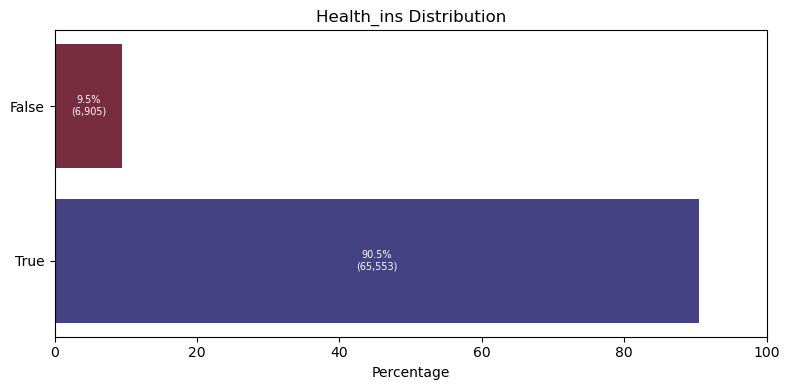

In [112]:
plot_category_distribution(df, 'health_ins', 'icefire')

Our target variable is **highly imbalanced**, with only 9.5% of the customers being uninsured. This is a big issue that will need to be addressed in the data preprocessing section, as training a model with an imbalanced target variable can lead to poor performance.

#### **sex**

In terms of gender, there are only two categories represented: Male/Female. The distribution of the values is balanced, with 51.7% of examples being Female and 48.3% being Male. There are no missing values. This is a categorical feature which seems to be well structured.


In [113]:
show_num_missing_values(df, 'sex')

There are no missing values in this column.


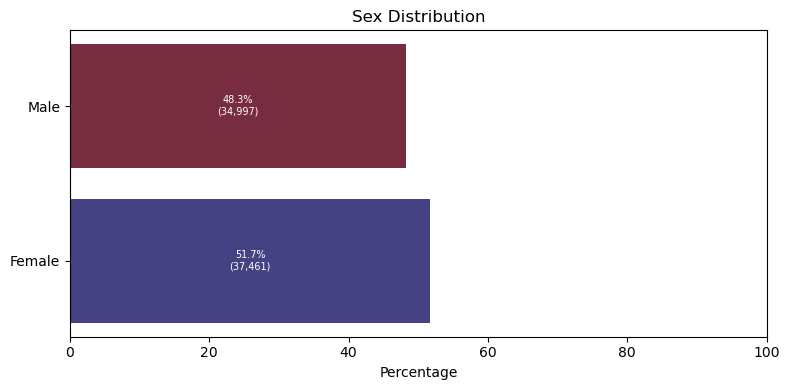

In [114]:
plot_category_distribution(df, 'sex', 'icefire')

#### **is_employed**


In [115]:
show_num_missing_values(df, 'is_employed')

Missing values in this column:  25515 ( 35.21 % )


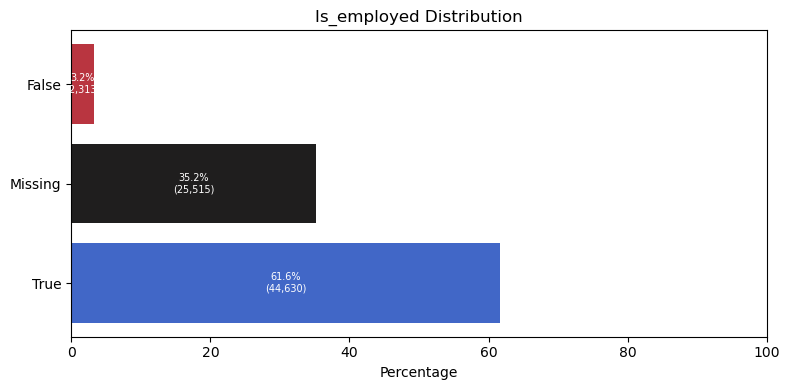

In [116]:
plot_category_distribution(df, 'is_employed', 'icefire')

This feature has a high percentage of missing values (35.2 %). It's highly imbalanced, among the non-missing values, 95% of the customers are employed. This feature will need to be addressed in the data preprocessing section.

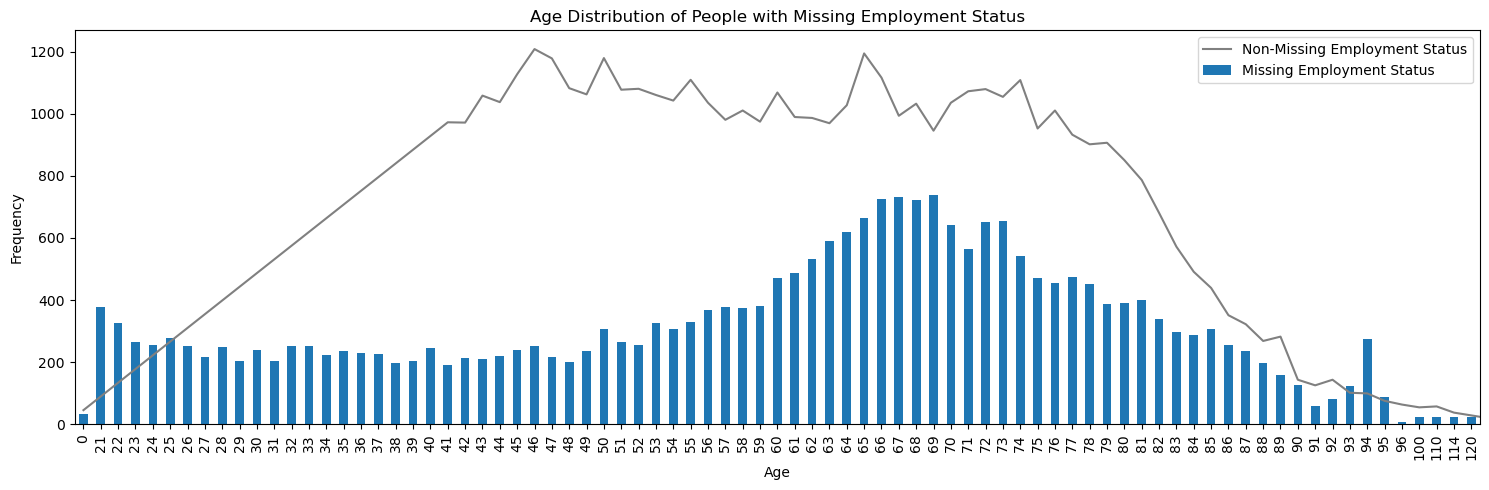

In [117]:
df_missing_employment_status = df[df['is_employed'].isnull()]
age_distribution_missing_employment = df_missing_employment_status['age'].value_counts().sort_index()

df_non_missing_employment_status = df[~df['is_employed'].isnull()]
age_distribution_non_missing = df_non_missing_employment_status['age'].value_counts().sort_index()

plt.figure(figsize=(15, 5))

age_distribution_missing_employment.plot(kind='bar',  label='Missing Employment Status')
age_distribution_non_missing.plot(kind='line', color='gray', label='Non-Missing Employment Status')

plt.title('Age Distribution of People with Missing Employment Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

As we can see in the image, younger individuals and elderly individuals(60+) are more likely to have missing employment status. In contraste middle-aged individuals(40-60) are more represented the group with non-missing employment status. This may be an indication that the missing values in the employment status are not missing at random, with students and retired individuals being more likely to have missing values.

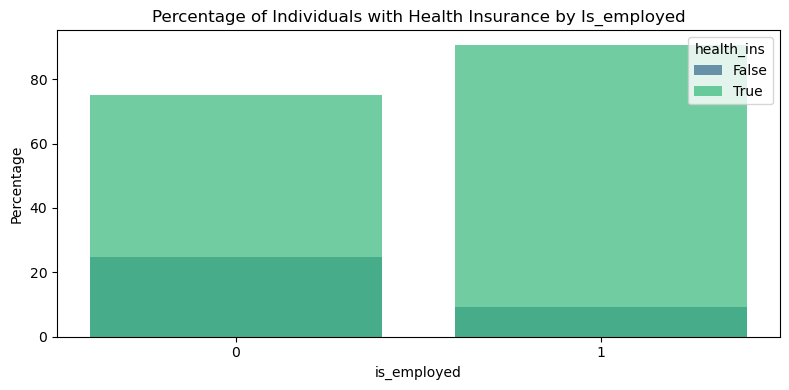

Of the employed people, 90.66% have health insurance.
Of the unemployed people, 75.23% have health insurance.


In [118]:
plot_feature_vs_target(df, 'is_employed', feature_type='categorical')

employed = df[df['is_employed'] == True]
employed_with_health_ins = employed[employed['health_ins'] == True]
percentage = round(len(employed_with_health_ins) / len(employed) * 100, 2)
print(f'Of the employed people, {percentage}% have health insurance.')


unemployed = df[df['is_employed'] == False]
unemployed_with_health_ins = unemployed[unemployed['health_ins'] == True]
percentage = round(len(unemployed_with_health_ins) / len(unemployed) * 100, 2)
print(f'Of the unemployed people, {percentage}% have health insurance.')


Unemployed individuals are more likely to be uninsured, while employed individuals are more likely to have health insurance. This is an expected result, as employed individuals are more likely to have access to health insurance through their employer.

#### **income**


There are no missing values in this column.


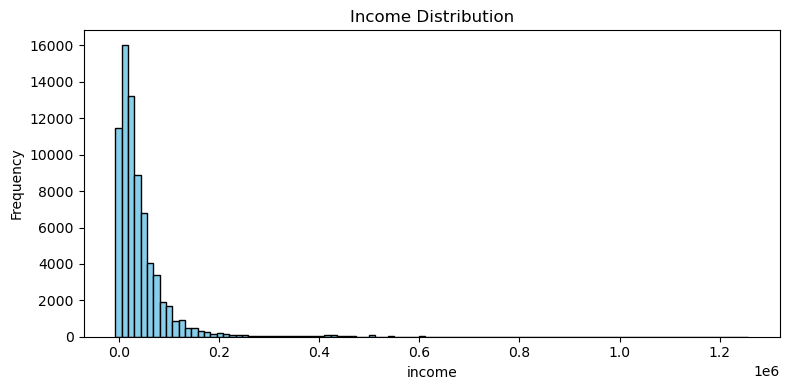

In [119]:
show_num_missing_values(df, 'income')

plot_numeric_distribution(df, 'income', 100)

In [120]:
df['income'].describe()

count    7.245800e+04
mean     4.188143e+04
std      5.827460e+04
min     -6.900000e+03
25%      1.070000e+04
50%      2.640000e+04
75%      5.200000e+04
max      1.257000e+06
Name: income, dtype: float64

In [121]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

print(f'Interquartile Range for income: {IQR}')

Interquartile Range for income: 41300.0


**Income** is a numerical feature with values ranging from -6900 to 1257000. It has a mean of 41881 and a standard deviation of 58274. As we can see in the boxplot below, there's many outliers in the data. In the preprocessing section, we will use normalization to deal with these outliers. In particular, we will use the log transformation to normalize as our data is right-skewed.

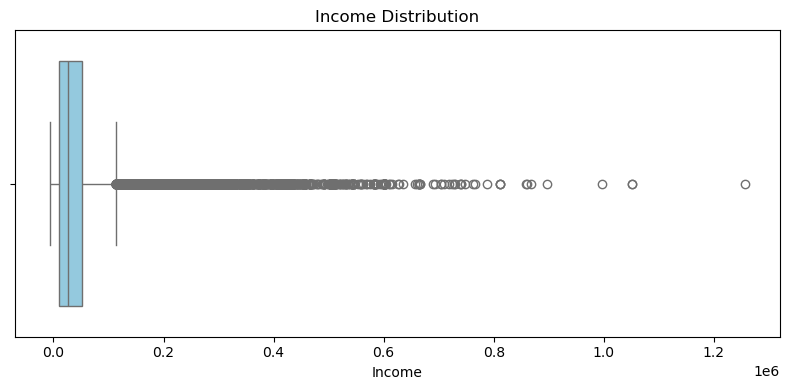

In [155]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='income', color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.tight_layout()
plt.show()


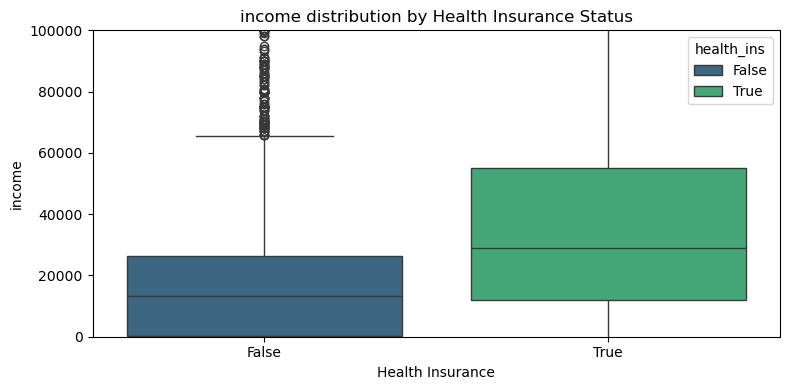

In [123]:
plot_feature_vs_target(df, 'income', feature_type='numerical', ylimit=(0, 100000), palette='viridis')


As we can see, there's some correlation between income distribution and health insurance status. Uninsured individuals tend to have lower income than insured individuals.

#### **marital_status**

There are no missing values in this column.


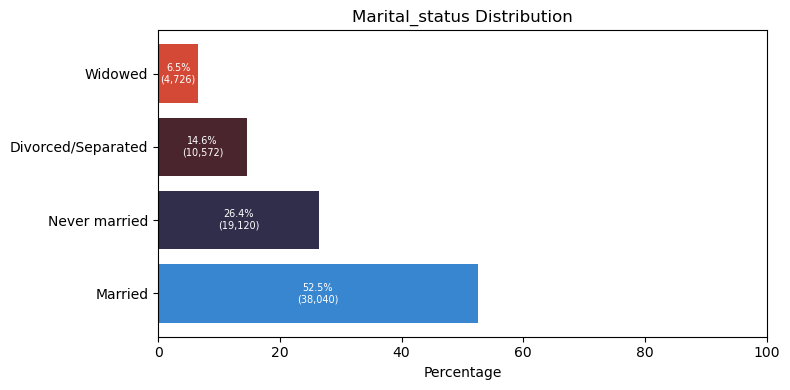

In [124]:
show_num_missing_values(df, 'marital_status')

plot_category_distribution(df, 'marital_status', 'icefire')

There's some imbalance in this category, 52.5% of the customers are married. There are no missing values.

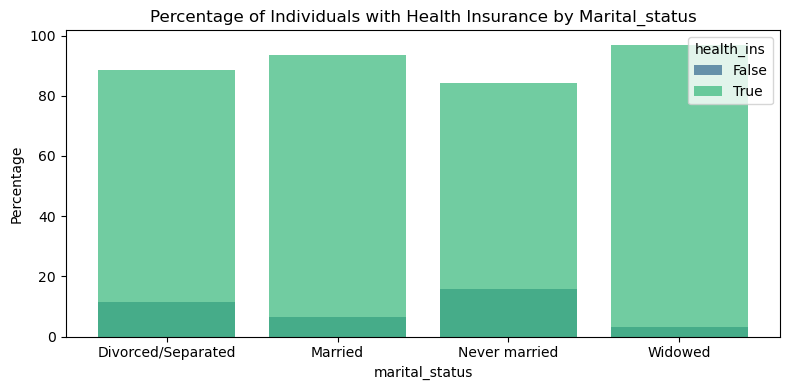

In [125]:
plot_feature_vs_target(df, 'marital_status', feature_type='categorical', palette='viridis')

As we can see, married and widowed individuals are more likely to have health insurance, while single and divorced individuals are more likely to be uninsured.

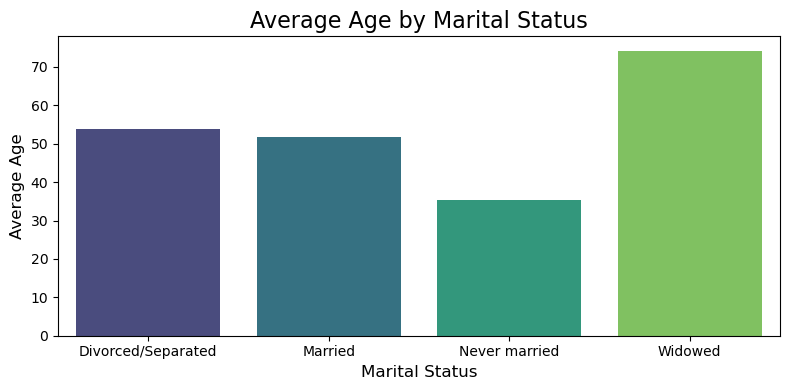

In [126]:
df_temp = df.copy()
marital_age = df_temp.groupby('marital_status')['age'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x=marital_age.index, y=marital_age.values, hue=marital_age.index, palette='viridis', legend=False)
plt.title('Average Age by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

As expected widowed individuals are more likely to be older, while single individuals are more likely to be younger.

#### **housing_type**

Missing values in this column:  1686 ( 2.33 % )


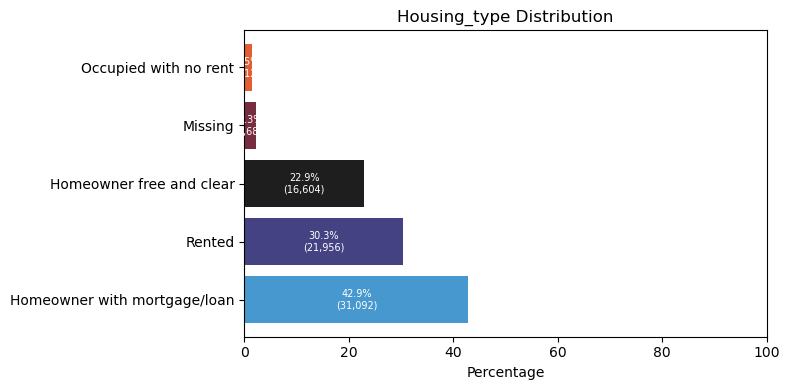

In [127]:
show_num_missing_values(df, 'housing_type')

plot_category_distribution(df, 'housing_type', 'icefire')

There's some missing values(2.33%) and the distribution of the values has some imbalance, with 42.9% of the customers being homeowners with mortgage. 

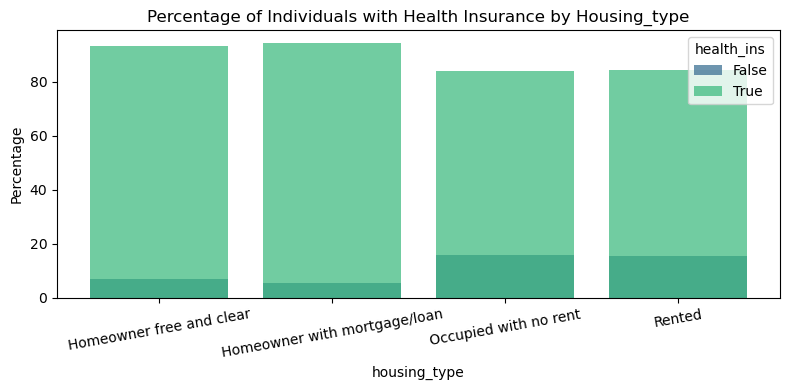

In [128]:
plot_feature_vs_target(df, 'housing_type', feature_type='categorical', palette='viridis', x_rotation=10)

Homeowners are more likely to have health insurance than renters. This is an expected result, as homeowners are more likely to be older and have higher income than renters

#### **num_vehicles**

Missing values in this column:  1686 ( 2.33 % )


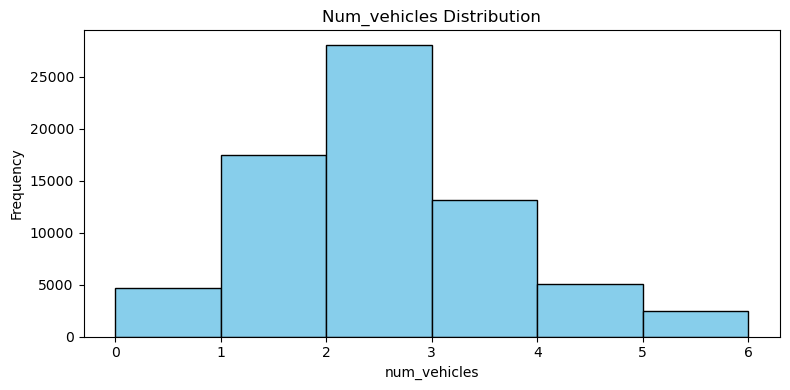

In [129]:
show_num_missing_values(df, 'num_vehicles')

plot_numeric_distribution(df, 'num_vehicles', 6)

There's some missing values(2.33%) in this feature, to deal with this we'll use KNN imputer. The distribution of the values follows a normal distribution with the most common value being 2 vehicles.

#### **age**

There are no missing values in this column.


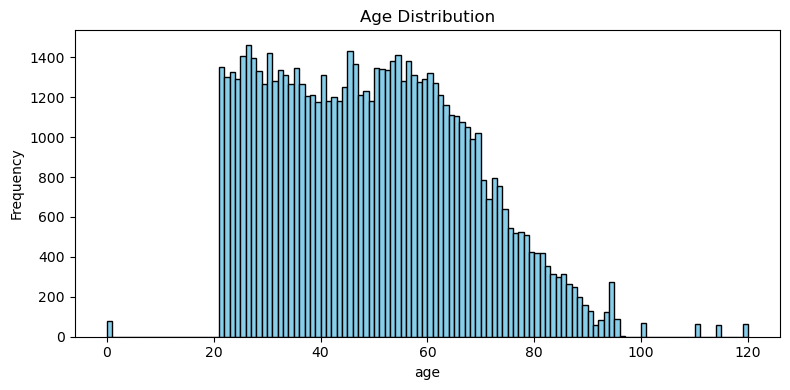

In [130]:
show_num_missing_values(df, 'age')

plot_numeric_distribution(df, 'age', 120)

In [131]:
df['age'].describe()

count    72458.000000
mean        49.208893
std         18.090035
min          0.000000
25%         34.000000
50%         48.000000
75%         62.000000
max        120.000000
Name: age, dtype: float64

As we can see, there are individuals with age 0 and some individuals with 110+ years old. The mean age is 49.2 years and the distribution is right-skewed. The minimum age is 0 and the maximum age is 120, in order to deal with outliers we will need to use min-max scaling.

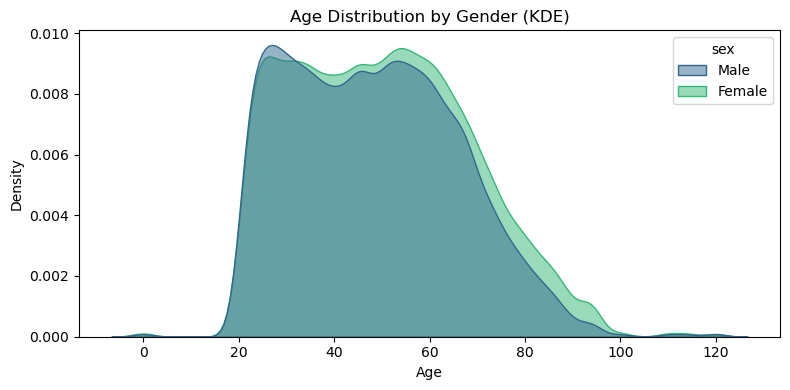

In [132]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='age', hue='sex', palette='viridis', fill=True, alpha=0.5)
plt.title('Age Distribution by Gender (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


The gender is well distributed among the different age groups. With Male being the majority in younger age groups with Women being the majority in older age groups(40+).

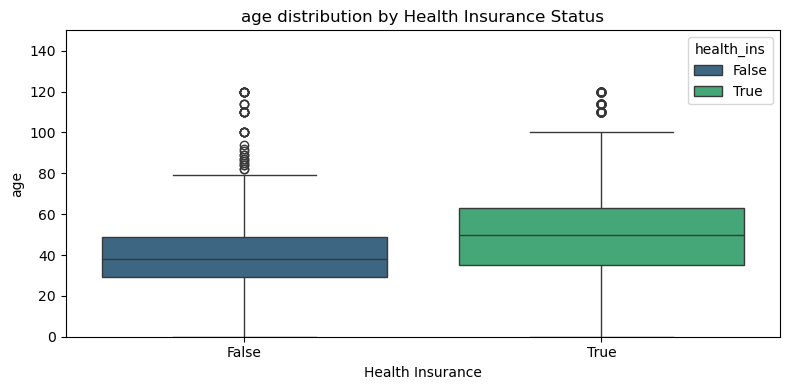

In [133]:
plot_feature_vs_target(df, 'age', feature_type='numerical', palette='viridis', ylimit=(0, 150), x_rotation=0)

Those with health insurance tend to be older than those without health insurance.

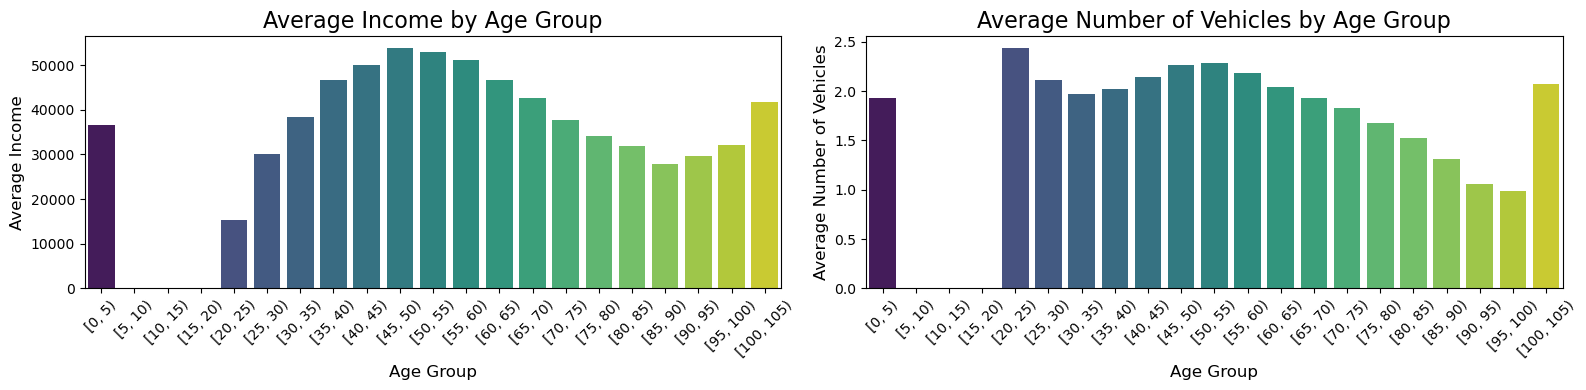

In [134]:
df_temp = df.copy()
df_temp['age_group'] = pd.cut(df_temp['age'], bins=range(0, 110, 5), right=False)

age_income = df_temp.groupby('age_group', observed=False)['income'].mean()
age_group_vehicles = df_temp.groupby('age_group', observed=False)['num_vehicles'].mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

sns.barplot(ax=axes[0], x=age_income.index, y=age_income.values, hue=age_income.index, palette='viridis', dodge=False)
axes[0].set_title('Average Income by Age Group', fontsize=16)
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Average Income', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend().remove()

sns.barplot(ax=axes[1], x=age_group_vehicles.index, y=age_group_vehicles.values, hue=age_group_vehicles.index, palette='viridis', dodge=False)
axes[1].set_title('Average Number of Vehicles by Age Group', fontsize=16)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('Average Number of Vehicles', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().remove()

plt.tight_layout()
plt.show()

The average income evolves as we we would expect, except for the increase in the values in the [0, 5] and 90+ age groups. The spike in the average number of vehicles in the  0 and the 100+ age group is also unexpected. These seem to be outliers.

In [135]:
print(f"Rows with age > 90 and employed: {df[(df['age'] > 90) & df['is_employed']].shape[0]}")
print(f"Rows with age = 0 and employed: {df[(df['age'] == 0) & df['is_employed']].shape[0]}")


Rows with age > 90 and employed: 167
Rows with age = 0 and employed: 43


The fact that there are 43 individuals with age 0 and 167 with age 90+ working corroborate that there are some inconsistencies. To correct these, we'll put the age of this individuals as missing values and use KNN imputer to fill them.

#### **state_of_res** and **code_column**

In [136]:
show_num_missing_values(df, 'state_of_res')
show_num_missing_values(df, 'code_column')

There are no missing values in this column.
There are no missing values in this column.


In [137]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['state_of_res_encoded'] = labelencoder.fit_transform(df['state_of_res'])
df['code_column_encoded'] = labelencoder.fit_transform(df['code_column'])


contingency_table = pd.crosstab(df['state_of_res_encoded'], df['code_column_encoded'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V correlation between 'state_of_res' and 'code_column': {cramers_v}")

Cramér's V correlation between 'state_of_res' and 'code_column': 1.0


The state_of_res and code_column are categorical features that represent the state of residence of the customer. They have a correlation of 1, so we can drop one of them. We will drop the code_column feature.

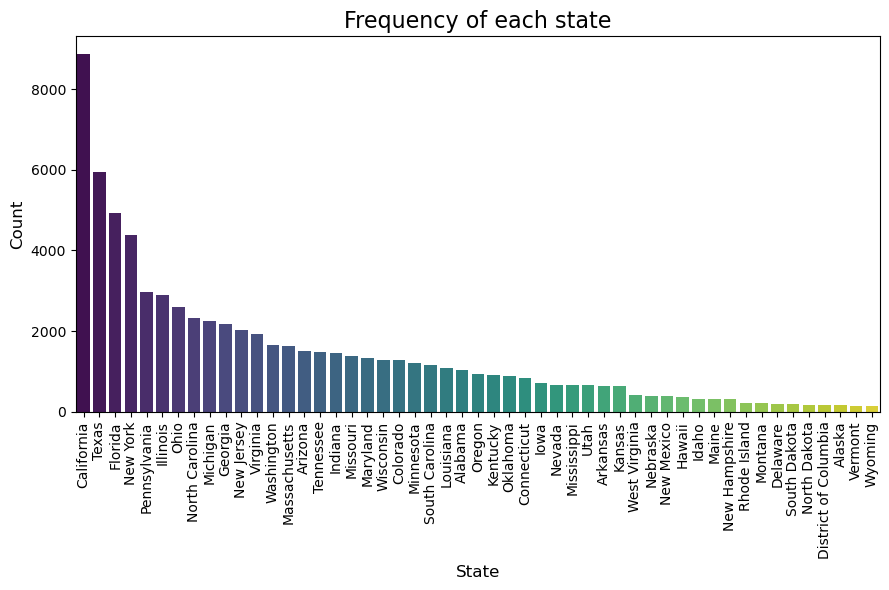

In [138]:
state_counts = df['state_of_res'].value_counts()
plt.figure(figsize=(9, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis', hue=state_counts.index, legend=False)
plt.title('Frequency of each state', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There is no missing values in these features. The dataset has more rows from states with higher population, such as California and Texas as opposed to states with lower population, such as Wyoming and Vermont.

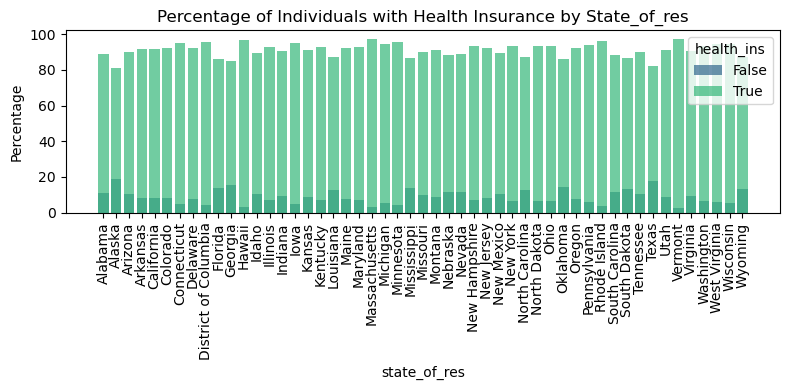

In [139]:
plot_feature_vs_target(df, 'state_of_res', feature_type='categorical', palette='viridis', x_rotation=90)

In [140]:
category_counts = (
    df.groupby(['state_of_res', 'health_ins'])
    .size()
    .reset_index(name='Count')
)

total_counts = (
    df.groupby('state_of_res')
    .size()
    .reset_index(name='Total')
)

category_percentages = category_counts.merge(total_counts, on='state_of_res')

category_percentages['Percentage'] = (
    category_percentages['Count'] / category_percentages['Total'] * 100
)

false_health_ins_percentage = category_percentages[category_percentages['health_ins'] == 0]

false_health_ins_percentage = false_health_ins_percentage.sort_values(
    by='Percentage', ascending=False
)

print('States with the highest percentage of individuals without health insurance:')
print(false_health_ins_percentage.head(5))

print('\nStates with the lowest percentage of individuals without health insurance:')
print(false_health_ins_percentage.tail(5))


States with the highest percentage of individuals without health insurance:
   state_of_res  health_ins  Count  Total  Percentage
2        Alaska       False     30    160   18.750000
86        Texas       False   1056   5938   17.783766
20      Georgia       False    331   2177   15.204410
72     Oklahoma       False    125    889   14.060742
18      Florida       False    687   4921   13.960577

States with the lowest percentage of individuals without health insurance:
            state_of_res  health_ins  Count  Total  Percentage
16  District of Columbia       False      7    168    4.166667
78          Rhode Island       False      8    218    3.669725
22                Hawaii       False     12    354    3.389831
42         Massachusetts       False     49   1635    2.996942
90               Vermont       False      4    146    2.739726


The states with more individuals without health insurance are Alaska, Texas, and Georgia. The states with more individuals with health insurance are District of Columbia, Rhode Island, and Hawaii.

#### **gas_usage**

Missing values in this column:  1686 ( 2.33 % )


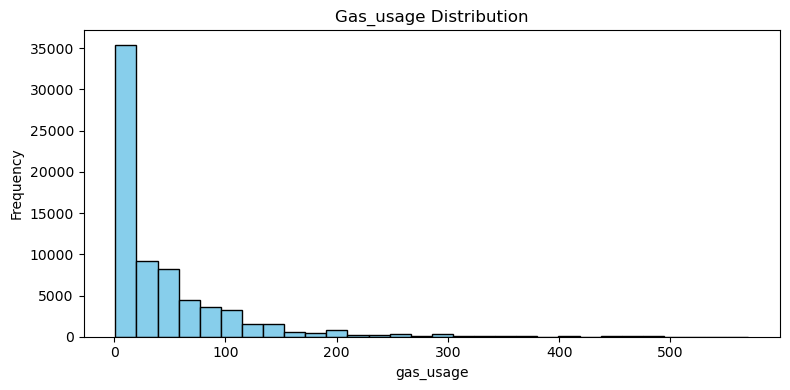

In [141]:
show_num_missing_values(df, 'gas_usage')

plot_numeric_distribution(df, 'gas_usage', 30)

In [158]:
df['gas_usage'].describe()

count    70772.000000
mean        41.230501
std         63.149323
min          1.000000
25%          3.000000
50%         10.000000
75%         60.000000
max        570.000000
Name: gas_usage, dtype: float64

There's some missing values in this feature(2.33%), to fill them we'll use KNN imputer. The distribution of the values is right-skewed, with a mean of 41 and a standard deviation of 63. We will use log normalization to deal with the outliers. 

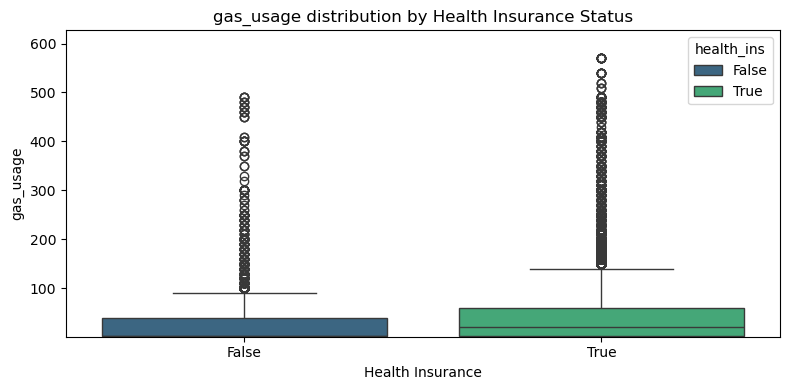

In [142]:
plot_feature_vs_target(df, 'gas_usage', feature_type='numerical', palette='viridis')

Those with health insurance tend to have higher gas usage than those without health insurance.

#### **rooms**

In [143]:
df['rooms'].value_counts()


rooms
2    12230
3    12134
5    12098
1    12042
6    11999
4    11955
Name: count, dtype: int64

There are no missing values in this column.


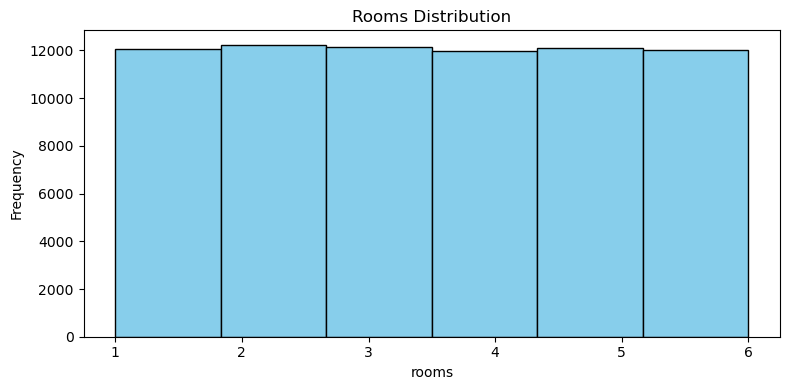

In [144]:
show_num_missing_values(df, 'rooms')

plot_numeric_distribution(df, 'rooms', 6)

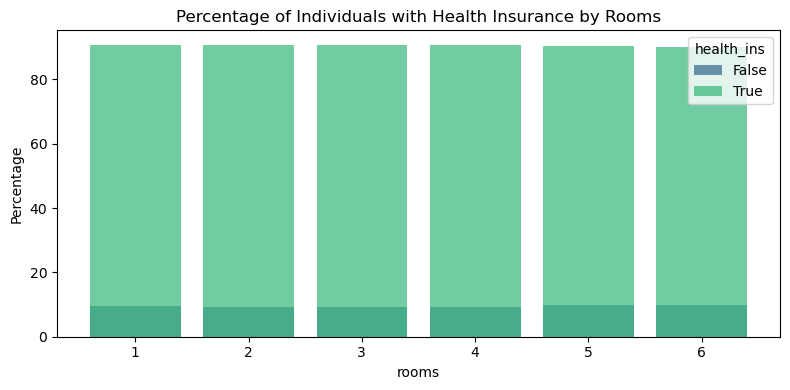

In [145]:
plot_feature_vs_target(df, 'rooms', palette='viridis')

In [146]:
contingency_table = pd.crosstab(df['rooms'], df['health_ins'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V correlation between 'rooms' and 'health_ins': {cramers_v}")

Cramér's V correlation between 'rooms' and 'health_ins': 0.008352802294724517


It doesn't seem to have a strong correlation between the rooms feature and the target variable. Thus, we will drop this feature.

#### **recent_move_b**

Missing values in this column:  1687 ( 2.33 % )


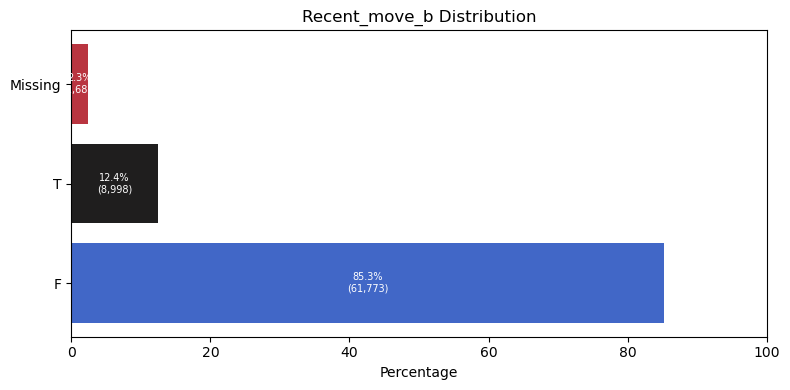

In [147]:
show_num_missing_values(df, 'recent_move_b')

plot_category_distribution(df, 'recent_move_b', 'icefire')

The recent_move_b has some missing values(2.33%), to fill them we'll use KNN imputer. The distribution of the values is imbalance, with 85.3% of the customers not having moved recently.

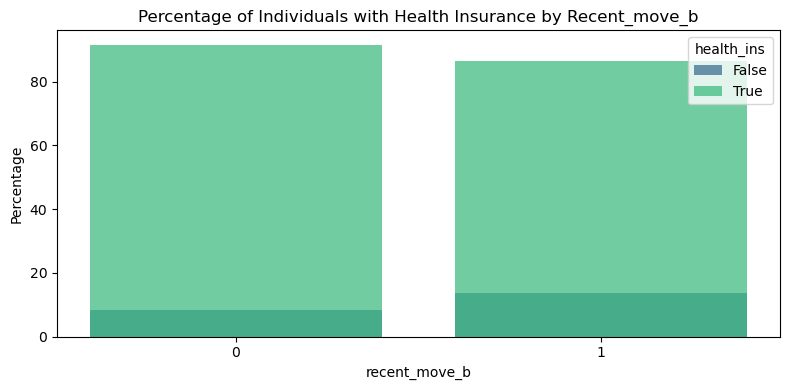

In [148]:
plot_feature_vs_target(df, 'recent_move_b', palette='viridis')

There's a slight correlation between recent move and health insurance status. Those who have moved recently are more likely to be uninsured than those who have not moved recently.

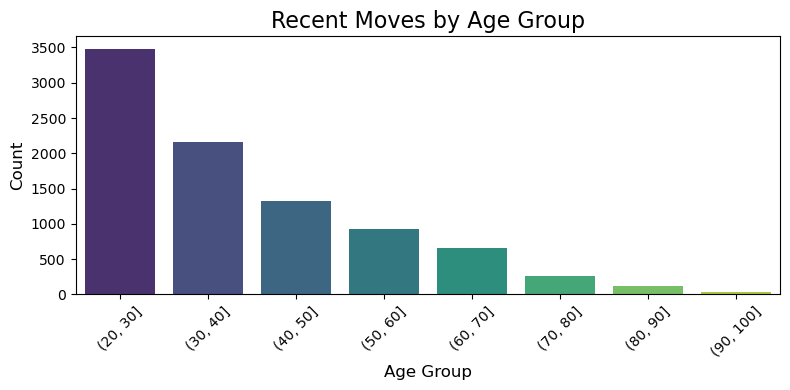

In [149]:
df_temp = df[df['recent_move_b'] == 'T'].copy()
df_temp['age_group'] = pd.cut(df_temp['age'], bins=range(20, 110, 10))

age_recent_moves = df_temp.groupby('age_group', observed=False).size()

plt.figure(figsize=(8, 4))
sns.barplot(x=age_recent_moves.index, y=age_recent_moves.values, hue=age_recent_moves.index, palette='viridis', dodge=False)
plt.legend().remove()

plt.title('Recent Moves by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

As we can see, the ones more prone to move are the younger individuals, while the older individuals are less likely to move.

C:\Users\adria\AppData\Local\Temp\ipykernel_15868\2301172441.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


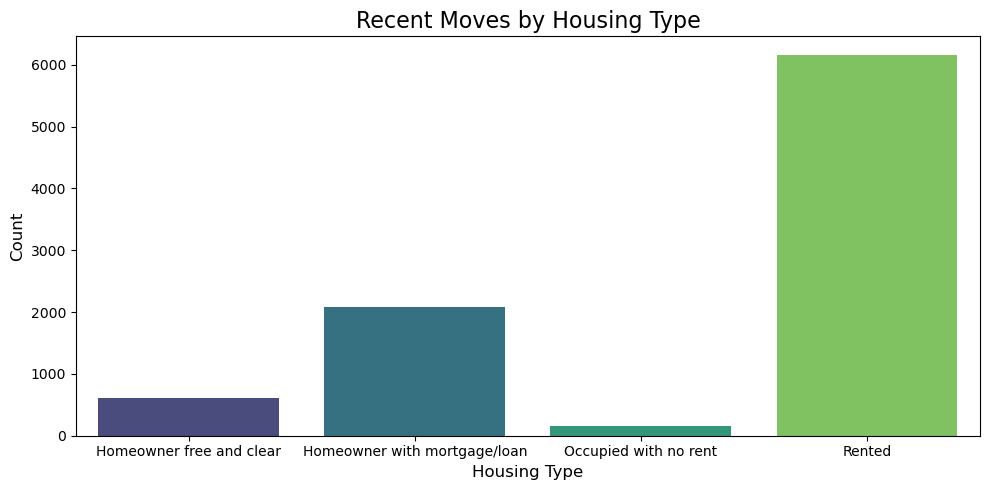

In [157]:

df_temp = df[df['recent_move_b'] == 'T'].copy()
df_temp = df_temp.groupby(['housing_type']).size()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_temp.index, y=df_temp.values, hue=df_temp.index, palette='viridis', dodge=False)
plt.legend().remove()

plt.title('Recent Moves by Housing Type', fontsize=16)
plt.xlabel('Housing Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Those who move tend to moveto rented houses. This is an expected result, as renters are more likely to move than homeowners.

## Correlations


In [151]:
numerical_features = ['income', 'num_vehicles', 'age', 'gas_usage', 'rooms']
categorical_features = ['health_ins', 'sex', 'is_employed', 'marital_status', 'housing_type', 'state_of_res', 'code_column', 'recent_move_b']

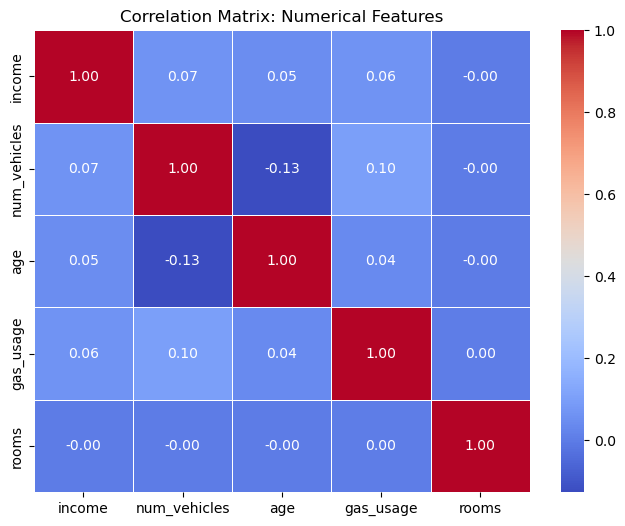

In [152]:
numerical_df = df[numerical_features]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Numerical Features")
plt.show()

Between numerical features it doesn't seem to have a strong correlation.

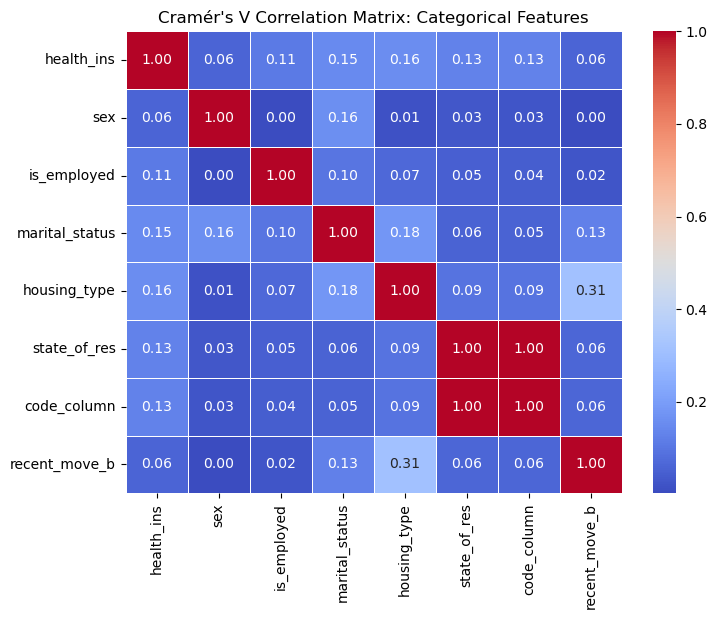

In [153]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1  
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Cramér's V Correlation Matrix: Categorical Features")
plt.show()

Other than the correlation we already mentioned between state_of_res and code_column, there's no strong correlation between the other features. There's a slight correlation between marital_status and housing_type, and between housing_type and recent_move_b.